In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as pyoffline
import plotly.figure_factory as ff
pyoffline.init_notebook_mode(connected=True)

from scipy.cluster.hierarchy import linkage, dendrogram


print(__version__)

3.1.0


In [3]:
train=pd.read_csv("loan.csv")


In [4]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)

table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [5]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [7]:
 train['Dependents'].value_counts()

0    570
2    160
1    160
3     91
Name: Dependents, dtype: int64

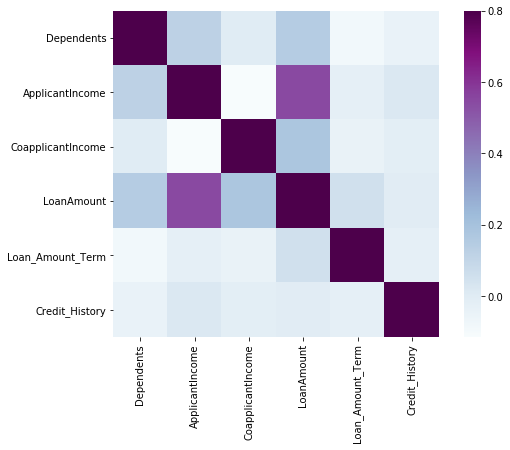

In [8]:
matrix = train.corr()
plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [9]:
from sklearn import preprocessing
x = train.loc[:,('ApplicantIncome','CoapplicantIncome','Dependents','LoanAmount')].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled

array([[0.07220988, 0.        , 0.        , 0.17510854],
       [0.05658025, 0.03619171, 0.33333333, 0.17221418],
       [0.03703704, 0.        , 0.        , 0.08248915],
       ...,
       [0.04012346, 0.04783162, 0.        , 0.16931983],
       [0.0617284 , 0.05743154, 0.        , 0.21562952],
       [0.11358025, 0.        , 0.        , 0.12879884]])

In [10]:

#append scaled columns
train['ApplicantIncome_scaled'] = x_scaled[:,0]
train['CoapplicantIncome_scaled'] =x_scaled[:,1]
train['Dependents_scaled'] =x_scaled[:,2]
train['LoanAmount_scaled'] =x_scaled[:,3]


#build feature matrix
X_tb = train.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','Dependents','Credit_History','LoanAmount'], axis=1)


X_tb.head()

,ApplicantIncome_scaled,CoapplicantIncome_scaled,Dependents_scaled,LoanAmount_scaled
0,0.072210,0.000000,0.000000,0.175109
1,0.056580,0.036192,0.333333,0.172214
2,0.037037,0.000000,0.000000,0.082489
3,0.031889,0.056592,0.000000,0.160637
4,0.074074,0.000000,0.000000,0.191027


In [11]:
from sklearn.mixture import GaussianMixture as GMM     

model = GMM(n_components=2, covariance_type='full') 
model.fit(X_tb)                    
tb_clusters = model.predict(X_tb)    
train['Loan_status'] =  tb_clusters

In [12]:
data=train.drop(['ApplicantIncome_scaled','CoapplicantIncome_scaled','Dependents_scaled',
            'LoanAmount_scaled'],axis=1)

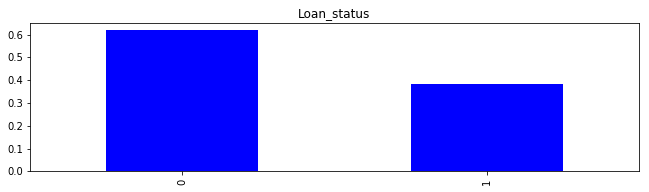

In [13]:
plt.figure(1)
plt.subplot(224)
train['Loan_status'].value_counts(normalize=True).plot.bar(figsize=(24,6),title= 'Loan_status',color="blue")
plt.show()

In [14]:
t=train[['ApplicantIncome_scaled','CoapplicantIncome_scaled','Dependents_scaled',
            'LoanAmount_scaled','Loan_status']]
t.head()
varieties = list(t.pop('Loan_status'))

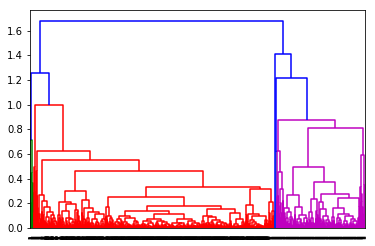

In [15]:



samples = t.values

mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6
           )

plt.show()

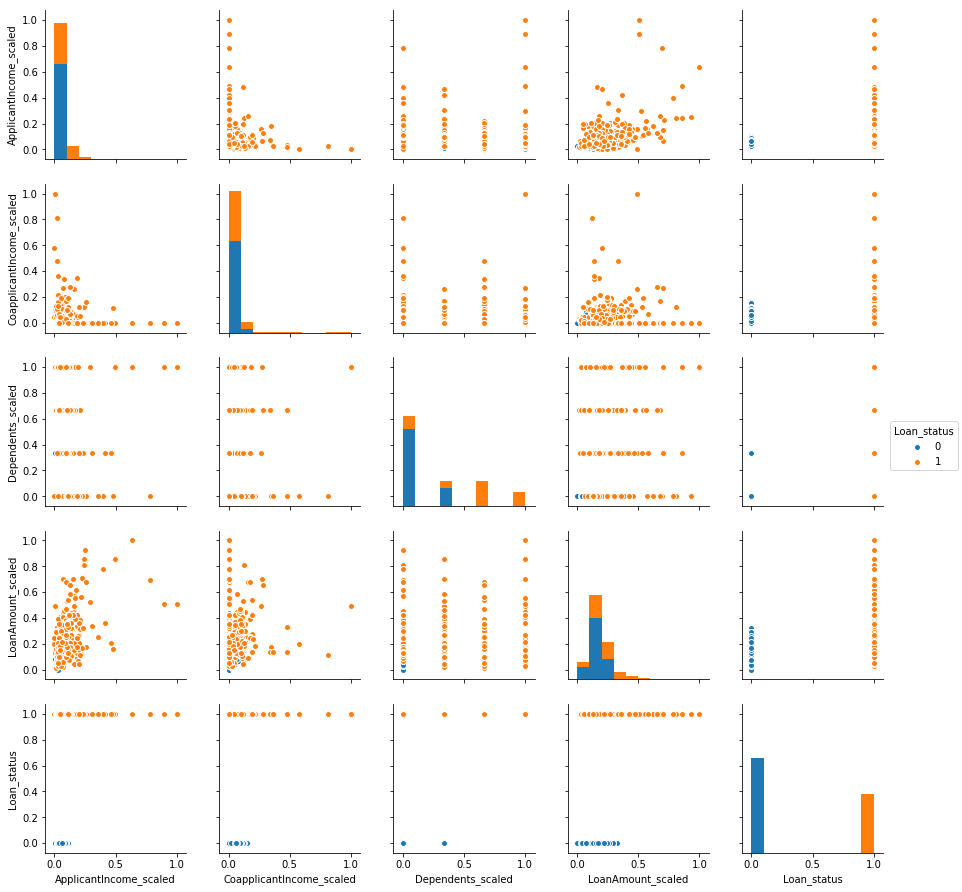

In [16]:
t=train[['ApplicantIncome_scaled','CoapplicantIncome_scaled','Dependents_scaled',
            'LoanAmount_scaled','Loan_status']]

sns.pairplot(t,hue="Loan_status",size=2.5)


In [17]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train['Gender']=number.fit_transform(train['Gender'].astype('str'))

In [47]:
train['Married']=number.fit_transform(train['Married'].astype('str'))
train['Education']=number.fit_transform(train['Education'].astype('str'))
train['Self_Employed']=number.fit_transform(train['Self_Employed'].astype('str'))
train['Property_Area']=number.fit_transform(train['Property_Area'].astype('str'))


In [48]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,ApplicantIncome_scaled,CoapplicantIncome_scaled,Dependents_scaled,LoanAmount_scaled,Loan_status,Gender_scaled,Married_scaled,Education_scaled,cluster
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,...,2,0.072210,0.000000,0.000000,0.175109,0,1.0,0.0,0.0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,...,0,0.056580,0.036192,0.333333,0.172214,1,1.0,1.0,0.0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,...,2,0.037037,0.000000,0.000000,0.082489,1,1.0,1.0,0.0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,...,2,0.031889,0.056592,0.000000,0.160637,1,1.0,1.0,1.0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,...,2,0.074074,0.000000,0.000000,0.191027,0,1.0,0.0,0.0,0


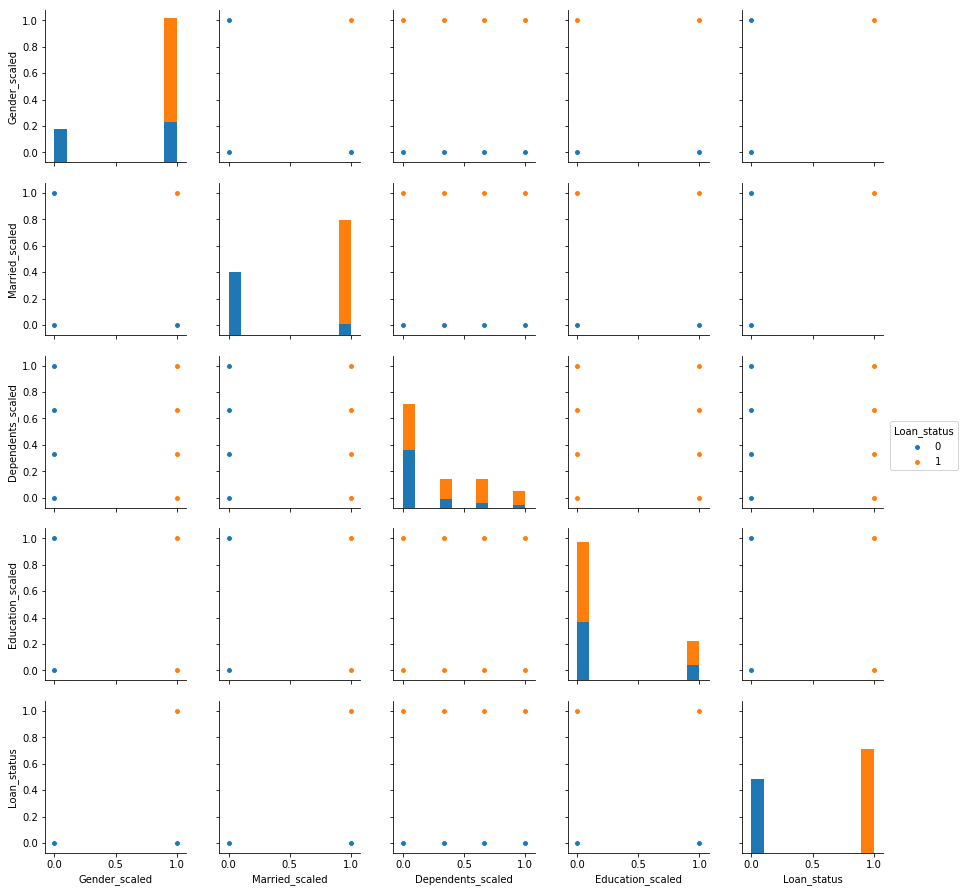

In [20]:
x = train.loc[:,('Gender','Married','Dependents','Education')].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

train['Gender_scaled'] = x_scaled[:,0]
train['Married_scaled'] =x_scaled[:,1]
train['Dependents_scaled'] =x_scaled[:,2]
train['Education_scaled'] =x_scaled[:,3]


#build feature matrix
X_tb = train.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','Dependents','Credit_History','LoanAmount'], axis=1)
model = GMM(n_components=2, covariance_type='full') 
model.fit(X_tb)                    
tb_clusters = model.predict(X_tb)  
train['Loan_status']=tb_clusters
t=train[['Gender_scaled','Married_scaled','Dependents_scaled',
            'Education_scaled','Loan_status']]

sns.pairplot(t,hue="Loan_status",size=2.5)

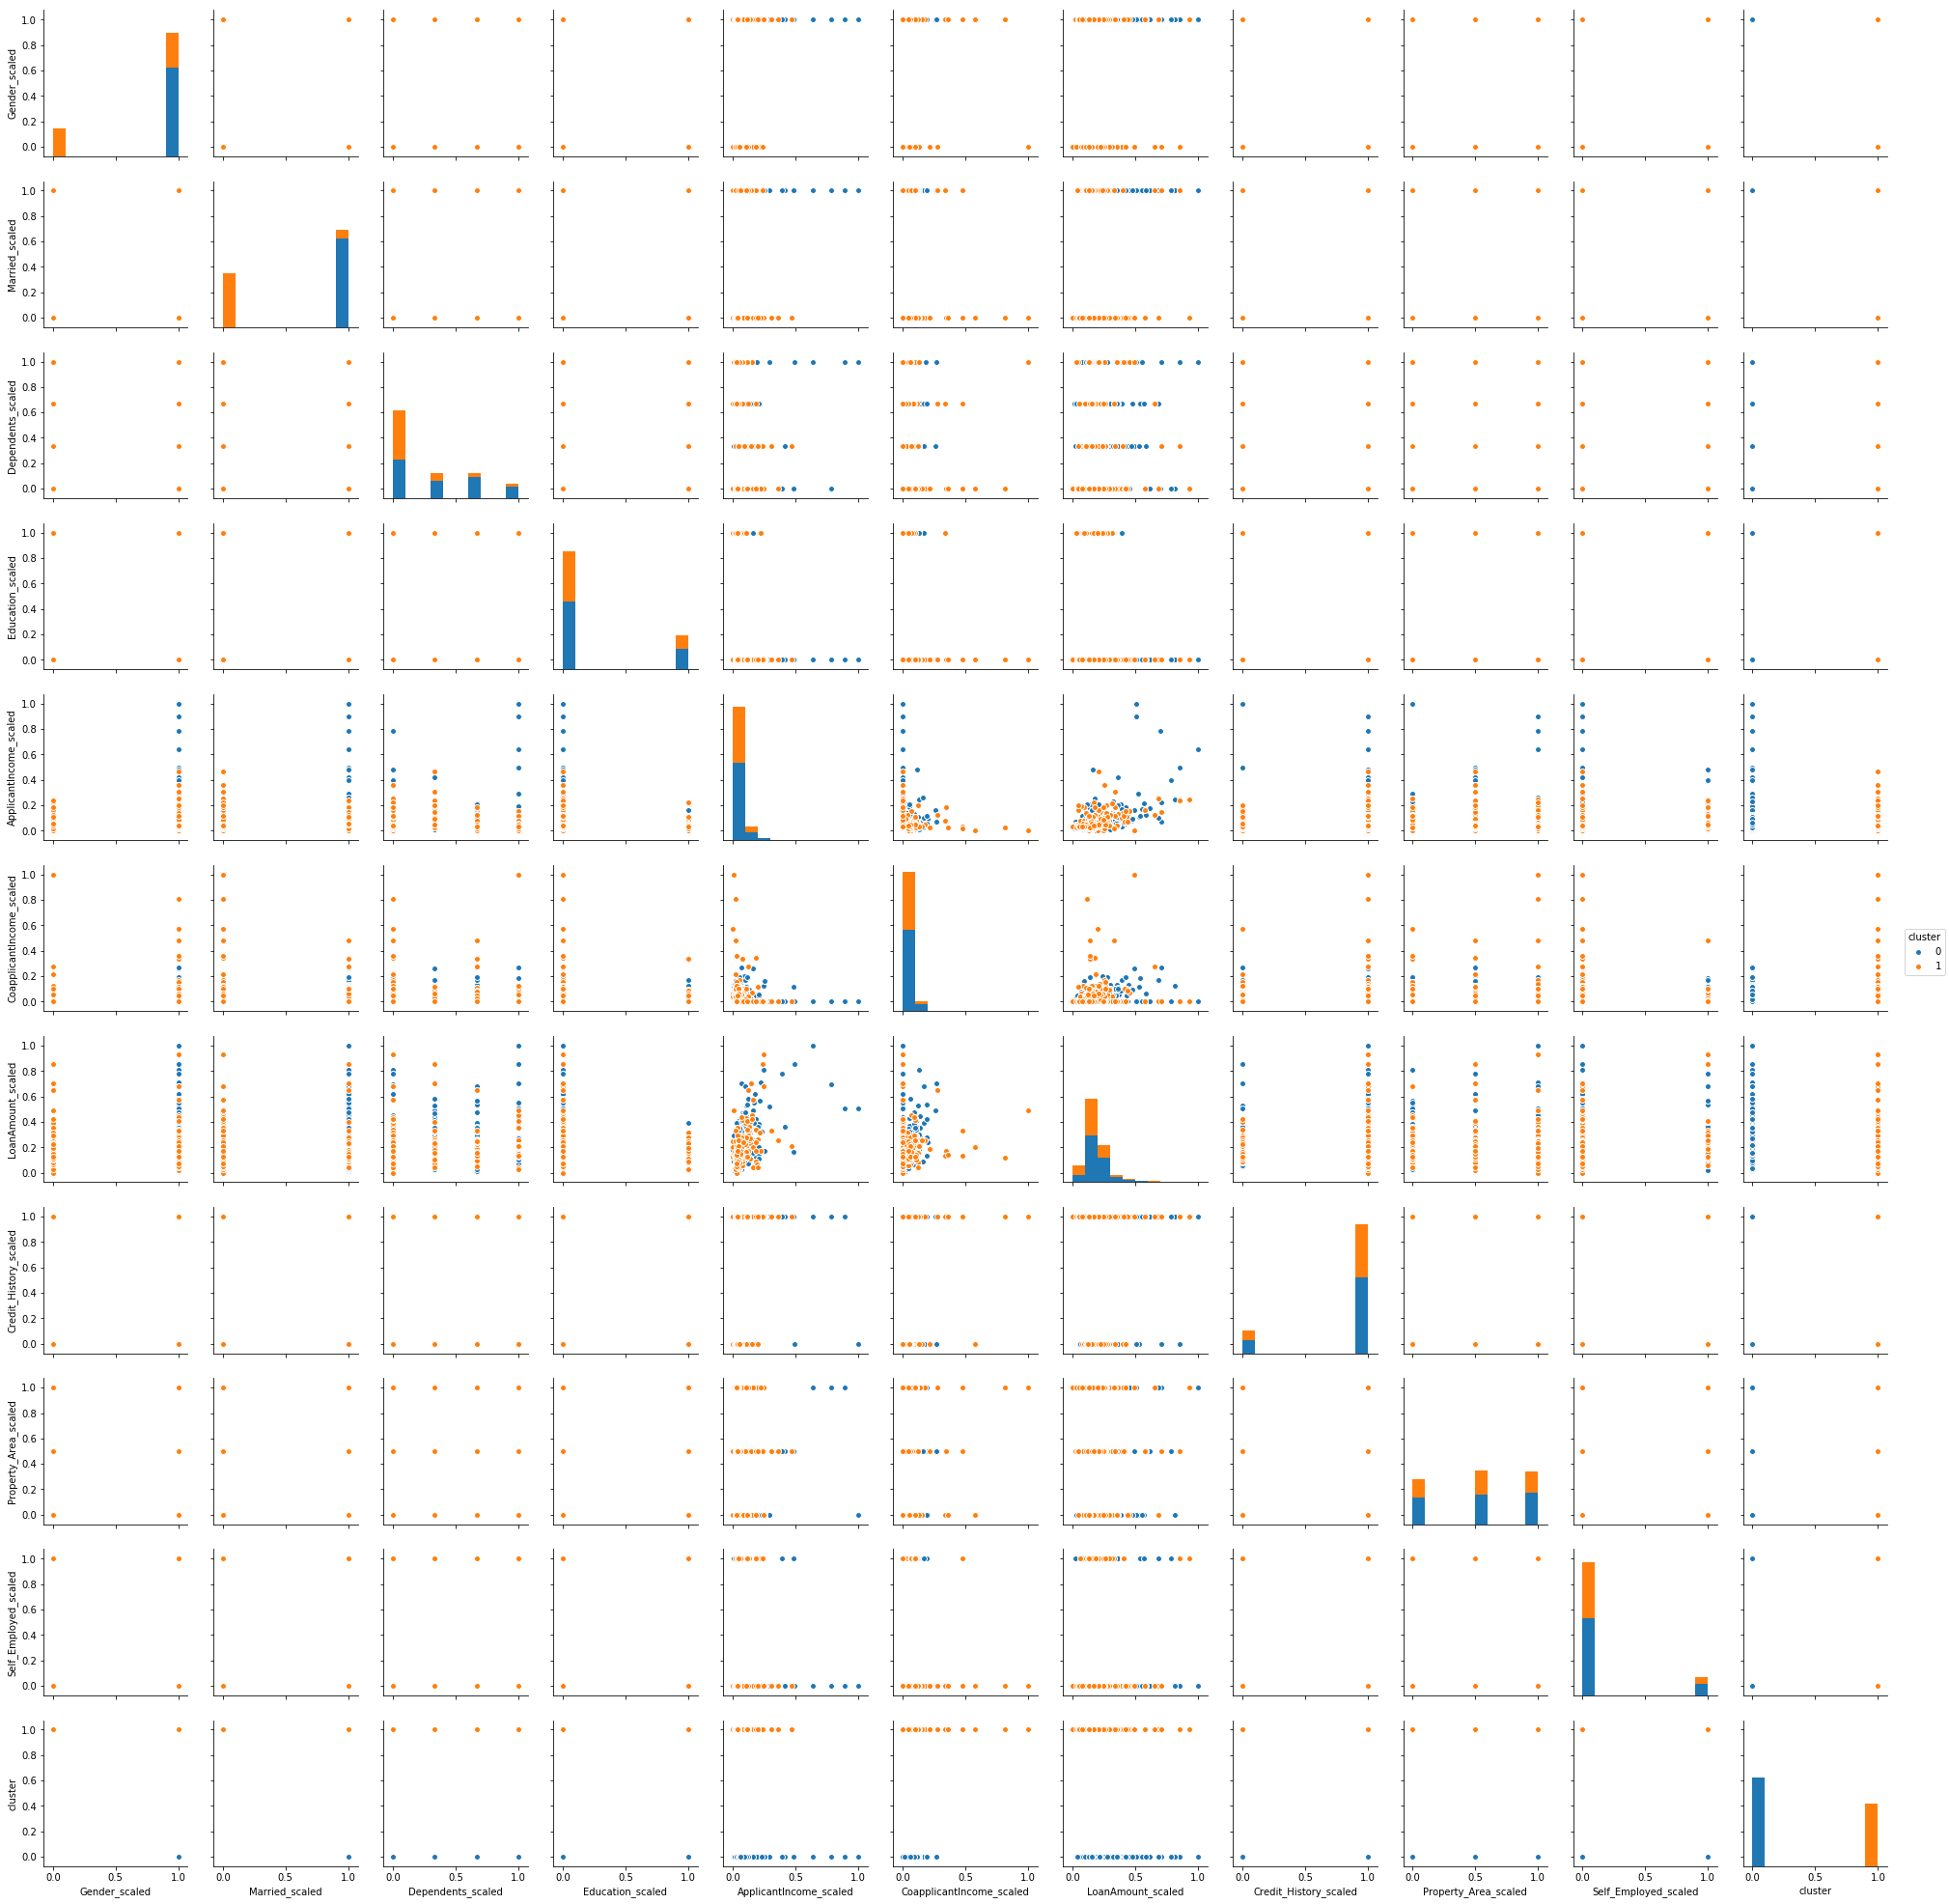

In [49]:
x = train.loc[:,('Gender','Married','Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area','Self_Employed')].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


train['Gender_scaled'] = x_scaled[:,0]
train['Married_scaled'] =x_scaled[:,1]
train['Dependents_scaled'] =x_scaled[:,2]
train['Education_scaled'] =x_scaled[:,3]
train['ApplicantIncome_scaled'] = x_scaled[:,4]
train['CoapplicantIncome_scaled'] =x_scaled[:,5]
train['LoanAmount_scaled'] =x_scaled[:,6]
train['Credit_History_scaled'] =x_scaled[:,7]
train['Property_Area_scaled'] =x_scaled[:,8]
train['Self_Employed_scaled'] =x_scaled[:,9]


#build feature matrix
X_tb = train.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','Dependents','Credit_History','LoanAmount'], axis=1)
model = GMM(n_components=2, covariance_type='full') 
model.fit(X_tb)                    
tb_clusters = model.predict(X_tb)  
train['cluster']=tb_clusters
t=train[['Gender_scaled','Married_scaled','Dependents_scaled',
            'Education_scaled','ApplicantIncome_scaled','CoapplicantIncome_scaled',
            'LoanAmount_scaled','Credit_History_scaled','Property_Area_scaled','Self_Employed_scaled',
            'cluster']]

# t.head()
sns.pairplot(t,hue="cluster",size=2.5)

In [50]:
cluster_1 = t[t['cluster']==0]
cluster_2 = t[t['cluster']==1]
t.head()

,Gender_scaled,Married_scaled,Dependents_scaled,Education_scaled,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled,Credit_History_scaled,Property_Area_scaled,Self_Employed_scaled,cluster
0,1.0,0.0,0.000000,0.0,0.072210,0.000000,0.175109,1.0,1.0,0.0,1
1,1.0,1.0,0.333333,0.0,0.056580,0.036192,0.172214,1.0,0.0,0.0,0
2,1.0,1.0,0.000000,0.0,0.037037,0.000000,0.082489,1.0,1.0,1.0,0
3,1.0,1.0,0.000000,1.0,0.031889,0.056592,0.160637,1.0,1.0,0.0,0
4,1.0,0.0,0.000000,0.0,0.074074,0.000000,0.191027,1.0,1.0,0.0,1


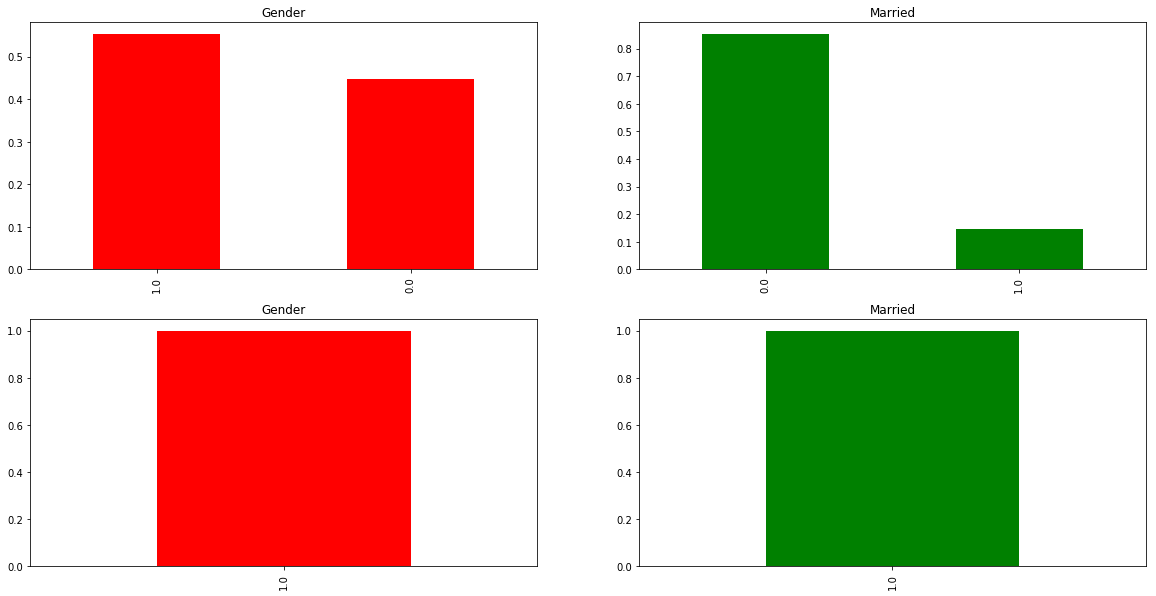

In [23]:
plt.figure(1)
plt.subplot(221)
cluster_1['Gender_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color="red")

plt.subplot(222)
cluster_1['Married_scaled'].value_counts(normalize=True).plot.bar(title= 'Married',color="green")

plt.subplot(223)
cluster_2['Gender_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color="red")

plt.subplot(224)
cluster_2['Married_scaled'].value_counts(normalize=True).plot.bar(title= 'Married',color="green")


plt.show()

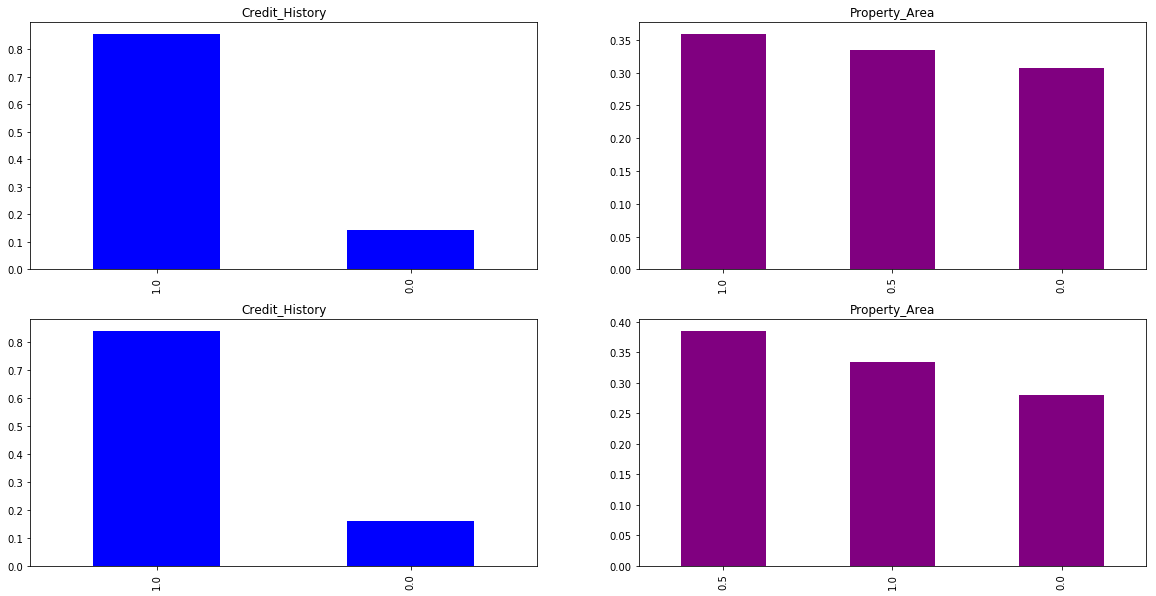

In [52]:
plt.figure(1)
plt.subplot(221)
cluster_1['Credit_History_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History', color="blue")

plt.subplot(222)
cluster_1['Property_Area_scaled'].value_counts(normalize=True).plot.bar(title= 'Property_Area',color="purple")

plt.subplot(223)
cluster_2['Credit_History_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History', color="blue")

plt.subplot(224)
cluster_2['Property_Area_scaled'].value_counts(normalize=True).plot.bar(title= 'Property_Area',color="purple")


plt.show()

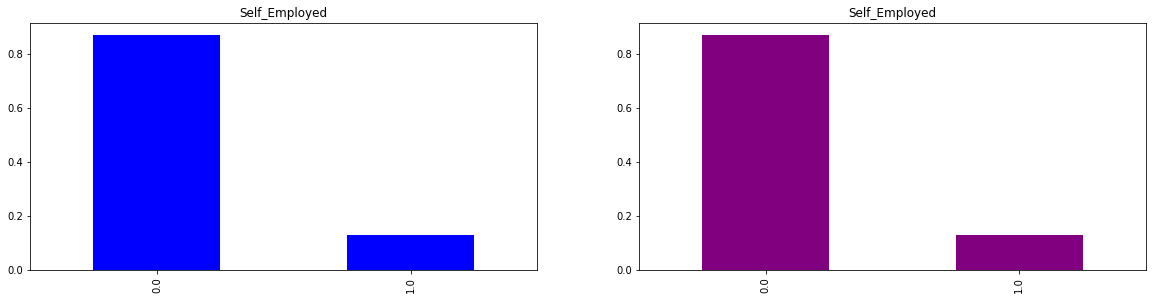

In [60]:
plt.figure(1)
plt.subplot(221)
cluster_1['Self_Employed_scaled'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Self_Employed', color="blue")

plt.subplot(222)
cluster_1['Self_Employed_scaled'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color="purple")


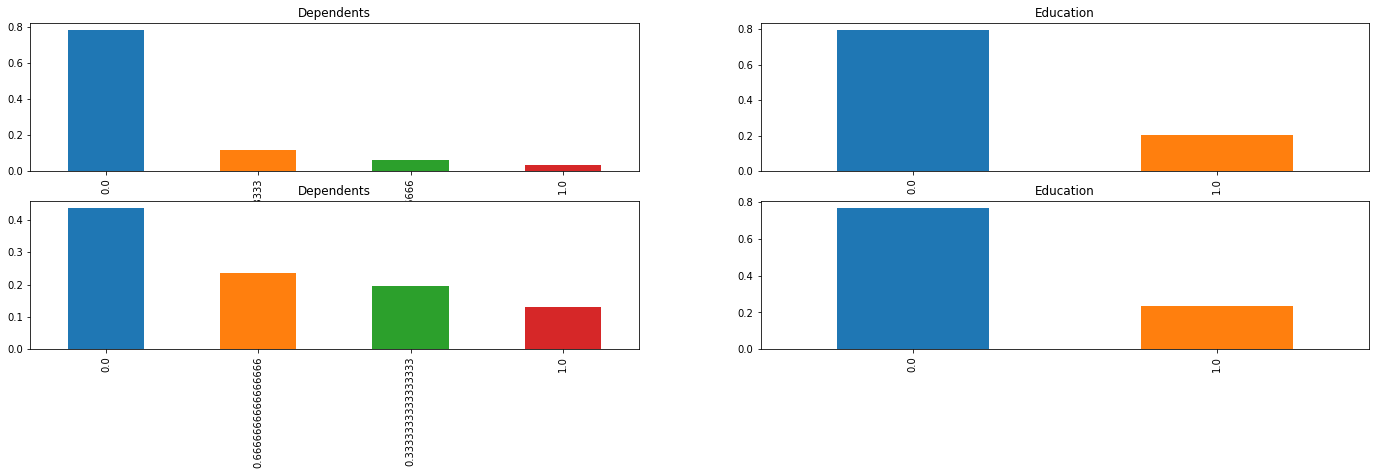

In [24]:
plt.subplot(221)
cluster_1['Dependents_scaled'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(222)
cluster_1['Education_scaled'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(223)
cluster_2['Dependents_scaled'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(224)
cluster_2['Education_scaled'].value_counts(normalize=True).plot.bar(title= 'Education')



In [53]:
cluster_1['Credit_History_scaled'].describe()

count    574.000000
mean       0.855401
std        0.352003
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History_scaled, dtype: float64

In [54]:
cluster_2['Credit_History_scaled'].describe()

count    407.000000
mean       0.840295
std        0.366783
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History_scaled, dtype: float64

In [55]:
cluster_1['Property_Area_scaled'].describe()

count    574.000000
mean       0.526132
std        0.407410
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Property_Area_scaled, dtype: float64

In [56]:
cluster_2['Property_Area_scaled'].describe()

count    407.000000
mean       0.527027
std        0.391419
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Property_Area_scaled, dtype: float64

In [25]:
cluster_1['ApplicantIncome_scaled'].describe()

count    407.000000
mean       0.058623
std        0.047556
min        0.000000
25%        0.034642
50%        0.045272
75%        0.062395
max        0.465667
Name: ApplicantIncome_scaled, dtype: float64

In [26]:
cluster_2['ApplicantIncome_scaled'].describe()

count    574.000000
mean       0.067724
std        0.082571
min        0.001852
25%        0.035809
50%        0.048148
75%        0.070673
max        1.000000
Name: ApplicantIncome_scaled, dtype: float64

In [27]:

print(cluster_1['CoapplicantIncome_scaled'].describe())
print(cluster_2['CoapplicantIncome_scaled'].describe())


count    407.000000
mean       0.035492
std        0.088179
min        0.000000
25%        0.000000
50%        0.000000
75%        0.050040
max        1.000000
Name: CoapplicantIncome_scaled, dtype: float64
count    574.000000
mean       0.040540
std        0.041973
min        0.000000
25%        0.000000
50%        0.036468
75%        0.059796
max        0.271198
Name: CoapplicantIncome_scaled, dtype: float64


In [28]:

print(cluster_1['LoanAmount_scaled'].describe())
print(cluster_2['LoanAmount_scaled'].describe())

count    407.000000
mean       0.173996
std        0.101022
min        0.000000
25%        0.123010
50%        0.156295
75%        0.202605
max        0.927641
Name: LoanAmount_scaled, dtype: float64
count    574.000000
mean       0.205880
std        0.115124
min        0.011577
25%        0.146165
50%        0.177279
75%        0.235890
max        1.000000
Name: LoanAmount_scaled, dtype: float64


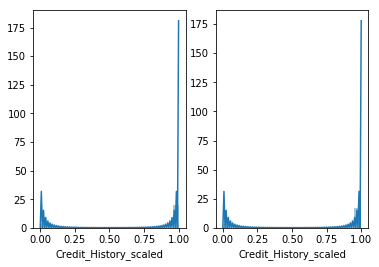

In [57]:
plt.subplot(121)
sns.distplot(cluster_1['Credit_History_scaled'].dropna());
plt.subplot(122)
sns.distplot(cluster_2['Credit_History_scaled'].dropna());
plt.show()

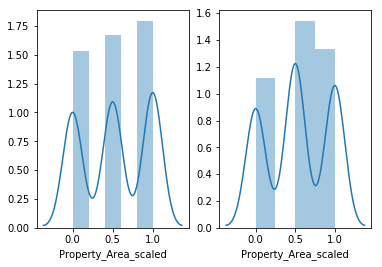

In [58]:
plt.subplot(121)
sns.distplot(cluster_1['Property_Area_scaled'].dropna());
plt.subplot(122)
sns.distplot(cluster_2['Property_Area_scaled'].dropna());
plt.show()

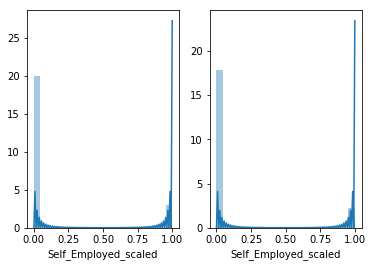

In [61]:
plt.subplot(121)
sns.distplot(cluster_1['Self_Employed_scaled'].dropna());
plt.subplot(122)
sns.distplot(cluster_2['Self_Employed_scaled'].dropna());
plt.show()

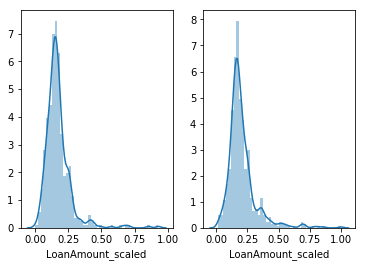

In [29]:
plt.subplot(121)
sns.distplot(cluster_1['LoanAmount_scaled'].dropna());
plt.subplot(122)
sns.distplot(cluster_2['LoanAmount_scaled'].dropna());
plt.show()

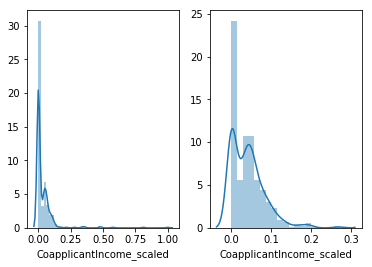

In [30]:
plt.subplot(121)
# c=cluster_1[cluster_1['CoapplicantIncome_scaled']!=0]
sns.distplot(cluster_1['CoapplicantIncome_scaled'].dropna());
plt.subplot(122)
sns.distplot(cluster_2['CoapplicantIncome_scaled'].dropna());
plt.show()

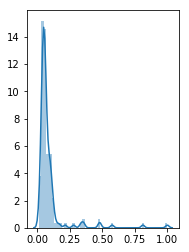

In [44]:
newvalues = [x for x in cluster_1['CoapplicantIncome_scaled'] if x > 0]
Beam_irradiance_DNI = np.array(newvalues)
# plt.hist(Beam_irradiance_DNI[Beam_irradiance_DNI>0], color="grey")
plt.subplot(121)
# c=cluster_1[cluster_1['CoapplicantIncome_scaled']!=0]
sns.distplot(Beam_irradiance_DNI[Beam_irradiance_DNI>0]);
# plt.subplot(122)
# sns.distplot(Beam_irradiance_DNI[Beam_irradiance_DNI>0]);
plt.show()

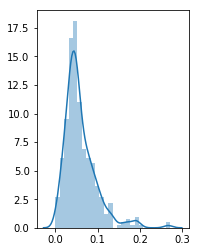

In [42]:
newvalues = [x for x in cluster_2['CoapplicantIncome_scaled'] if x > 0]
Beam_irradiance_DNI = np.array(newvalues)
plt.hist(Beam_irradiance_DNI[Beam_irradiance_DNI>0], color="grey")



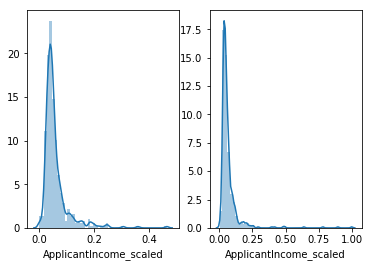

In [33]:
plt.subplot(121)
sns.distplot(cluster_1['ApplicantIncome_scaled'].dropna());
plt.subplot(122)
sns.distplot(cluster_2['ApplicantIncome_scaled'].dropna());
plt.show()

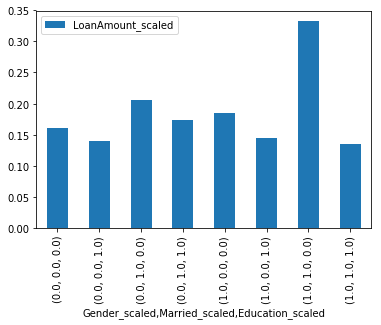

In [34]:
grps = cluster_1.pivot_table(values=["LoanAmount_scaled"], index=["Gender_scaled","Married_scaled","Education_scaled"], aggfunc=np.mean)
grps.plot(kind = 'bar')

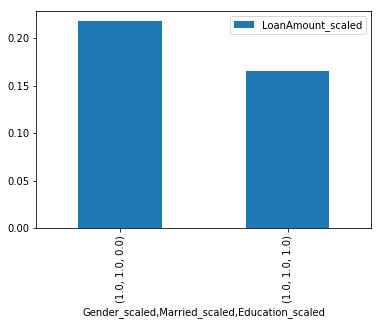

In [35]:
grps = cluster_2.pivot_table(values=["LoanAmount_scaled"], index=["Gender_scaled","Married_scaled","Education_scaled"], aggfunc=np.mean)
grps.plot(kind = 'bar')


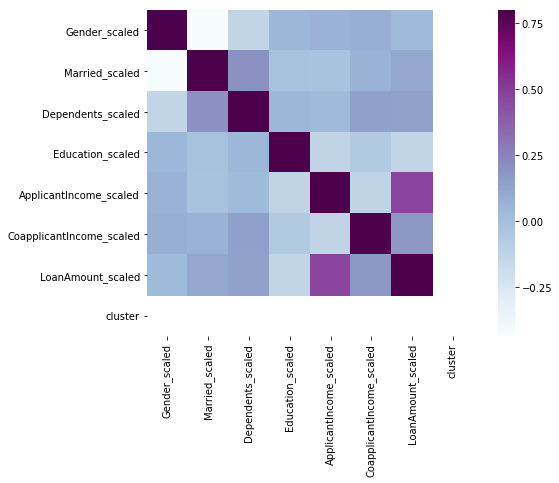

In [36]:
matrix = cluster_1.corr()
plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

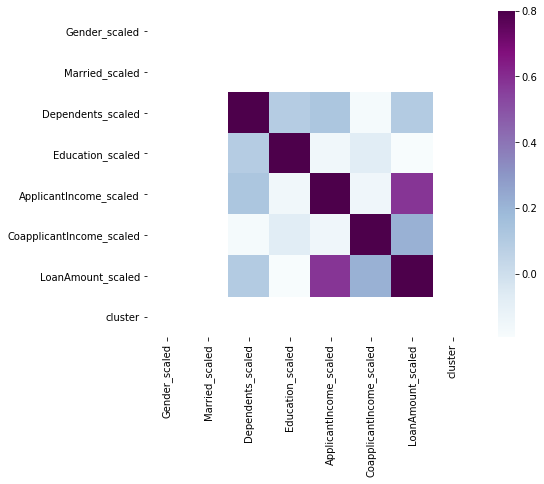

In [37]:

matrix = cluster_2.corr()
plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

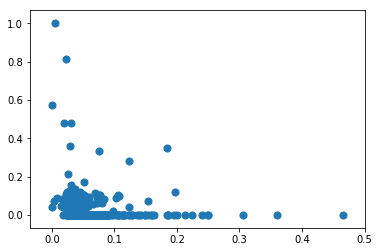

In [38]:
plt.scatter(cluster_1['ApplicantIncome_scaled'],cluster_1['CoapplicantIncome_scaled'],s=50,cmap='viridis')

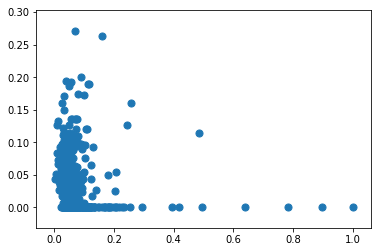

In [39]:
plt.scatter(cluster_2['ApplicantIncome_scaled'],cluster_2['CoapplicantIncome_scaled'],s=50,cmap='viridis')

In [40]:
 cluster_1.head()

,Gender_scaled,Married_scaled,Dependents_scaled,Education_scaled,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled,cluster
0,1.0,0.0,0.000000,0.0,0.072210,0.000000,0.175109,0
4,1.0,0.0,0.000000,0.0,0.074074,0.000000,0.191027,0
13,1.0,0.0,0.000000,0.0,0.022877,0.068159,0.151954,0
15,1.0,0.0,0.000000,0.0,0.061111,0.000000,0.167873,0
16,1.0,0.0,0.333333,1.0,0.044395,0.000000,0.131693,0
